<a href="https://colab.research.google.com/github/manishramamoorthy/manishramamoorthy/blob/main/Assignment5_6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [38]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
data = pd.DataFrame(ground_cricket_data)

In [39]:
data.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [40]:
data.shape

(15, 2)

In [41]:
data.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [42]:
data.isnull().sum()

Chirps/Second         0
Ground Temperature    0
dtype: int64

In [43]:
data = data.drop_duplicates()

In [44]:
data.dtypes

Chirps/Second         float64
Ground Temperature    float64
dtype: object

In [36]:
data.columns

Index(['Sex', 'Rank', 'Year', 'Degree', 'YSdeg', 'Salary'], dtype='object')

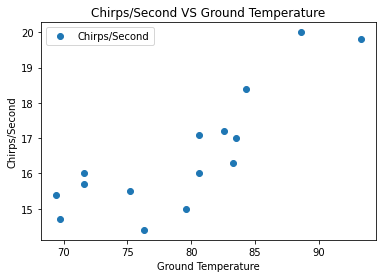

In [46]:
data.plot(x="Ground Temperature",y="Chirps/Second",style="o")
plt.title("Chirps/Second VS Ground Temperature")
plt.xlabel("Ground Temperature")
plt.ylabel("Chirps/Second")
plt.show()

In [45]:
data.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


In [47]:
X = data[["Ground Temperature"]]
y = data["Chirps/Second"]

In [48]:
from sklearn.model_selection import train_test_split
X_train,y_train,X_test,y_test = train_test_split(X,y,test_size=0.3)

In [49]:
y_test

9     16.3
13    17.0
3     18.4
6     14.7
4     17.1
Name: Chirps/Second, dtype: float64

In [50]:
X_train.shape,y_train.shape

((10, 1), (5, 1))

In [51]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X,y)

LinearRegression()

In [52]:
# 1) Find the Linear regression eqaution for this data
# y = m * X + c

In [53]:
print(regressor.intercept_) # c

0.45931464523595267


In [54]:
print(regressor.coef_) # m

[0.20299973]


In [55]:
print('Linear Regression Equation: y = {:.4f} * x + {:.4f}'.format(regressor.coef_[0], regressor.intercept_))

Linear Regression Equation: y = 0.2030 * x + 0.4593


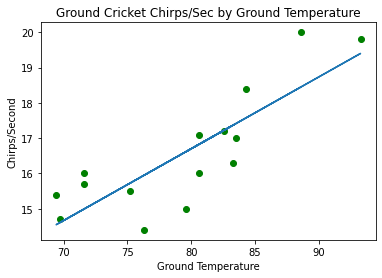

In [56]:
# 2) Chart the orginal data and equation on the chart
plt.scatter(X,y,color="g")
plt.plot(X,regressor.predict(X))
plt.title("Ground Cricket Chirps/Sec by Ground Temperature")
plt.xlabel("Ground Temperature")
plt.ylabel("Chirps/Second")
plt.show()
      

In [57]:
# 3) Find the equation of R2
from sklearn import metrics
print('R2 score for this equation: {:.4f}'.format(regressor.score(X, y)))
# the r2 below 0.8  that is not good fit of data

R2 score for this equation: 0.6923


In [58]:
# 5)Interpolate data
def chirps_to_temp(y):
    res = (y - regressor.intercept_) / regressor.coef_[0]
    print('With an observation of {} chirps/sec, ''we expect a ground temp of {:.2f}˚F'.format(y, res))
          

In [59]:
chirps_to_temp(18)

With an observation of 18 chirps/sec, we expect a ground temp of 86.41˚F


### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [60]:
data = pd.read_fwf("brain_body.txt")
data.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [61]:
data.shape

(62, 2)

In [62]:
data.isnull().sum()

Brain    0
Body     0
dtype: int64

In [63]:
data = data.drop_duplicates()

In [64]:
data.dtypes

Brain    float64
Body     float64
dtype: object

In [65]:
data.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [66]:
X = data[["Body"]]
y = data["Brain"]

In [67]:
from sklearn.model_selection import train_test_split
X_train,y_train,X_test,y_test = train_test_split(X,y,test_size = 0.3)

In [68]:
X_train.shape,y_train.shape

((43, 1), (19, 1))

In [69]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(X,y)

LinearRegression()

In [70]:
# 1)Find the linear regression equation for this data for brain weight to body weight.
# y = m*X + c


In [71]:
print(regressor.coef_) # m

[0.90291295]


In [72]:
print(regressor.intercept_) # c

-56.85554542859637


In [73]:
print('Linear Regression Equation: y = {:.4f} * x + {:.4f}'.format(regressor.coef_[0], regressor.intercept_))

Linear Regression Equation: y = 0.9029 * x + -56.8555


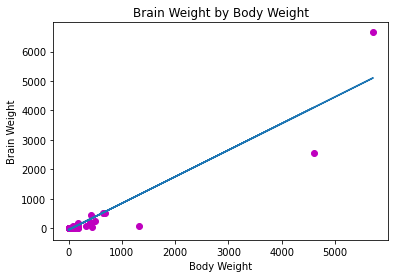

In [74]:
# 2) Chart the original data and the equation on the chart.
plt.scatter(X,y,color="m")
plt.plot(X,regressor.predict(X))
plt.title("Brain Weight by Body Weight")
plt.xlabel("Body Weight")
plt.ylabel("Brain Weight")
plt.show()
      

In [75]:
# 3) Find the equation's  R2  score:
print('R2 score for this euation: {:.4f}'.format(regressor.score(X,y)))

R2 score for this euation: 0.8727


In [76]:
#  The score is greater than 0.8 so, it is good fit of data

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [77]:
data = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [78]:
data.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [6]:
data.shape

(52, 6)

In [7]:
data.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [8]:
data = data.drop_duplicates()

In [9]:
data.dtypes

Sex       int64
Rank      int64
Year      int64
Degree    int64
YSdeg     int64
Salary    int64
dtype: object

In [10]:
data.corr()

,Sex,Rank,Year,Degree,YSdeg,Salary
Sex,1.000000,-0.230411,-0.379404,0.077112,-0.088288,-0.252782
Rank,-0.230411,1.000000,0.507980,-0.014564,0.695724,0.867488
Year,-0.379404,0.507980,1.000000,-0.143377,0.638776,0.700669
Degree,0.077112,-0.014564,-0.143377,1.000000,-0.482836,-0.069726
YSdeg,-0.088288,0.695724,0.638776,-0.482836,1.000000,0.674854
Salary,-0.252782,0.867488,0.700669,-0.069726,0.674854,1.000000


In [11]:
data.columns

Index(['Sex', 'Rank', 'Year', 'Degree', 'YSdeg', 'Salary'], dtype='object')

In [12]:
X = data[['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']]
y = data['Salary']

In [13]:
from sklearn.model_selection import train_test_split
X_train,y_train,X_test,y_test = train_test_split(X,y,test_size=0.3)

In [14]:
X_train.shape,y_train.shape

((36, 5), (16, 5))

In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X,y)

LinearRegression()

In [16]:
# 1)Find the linear regression equation for this data using columns 1-5 to column 6.
# y = X0 + X1 + X2 + X3 +c 

In [17]:
print(regressor.coef_) # m

[ 1241.7924996   5586.18144952   482.85976783 -1331.64406341
  -128.79057354]


In [18]:
print(regressor.intercept_) # c
          

11410.14654725559


In [21]:
# 2) Find the selection of columns with the best  R2  score.
print('R2 score selecting of all columns: {:.4f}'.format(regressor.score(X,y)))

R2 score selecting of all columns: 0.8547


In [ ]:
# 3) Report whether sex is a factor in salary.

In [23]:
data["Sex"].value_counts()

0    38
1    14
Name: Sex, dtype: int64

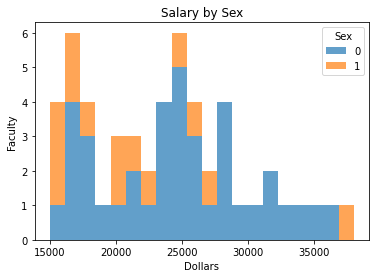

In [25]:
data.pivot_table(index=data.index, columns='Sex', values='Salary') \
    .plot(kind='hist', alpha=0.7, stacked=True, bins=20, title='Salary by Sex')
plt.xlabel('Dollars')
plt.ylabel('Faculty')
plt.show()

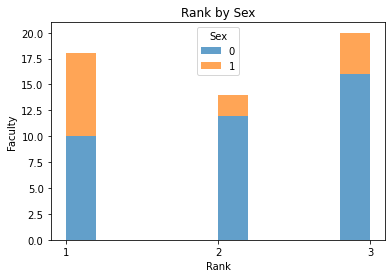

In [26]:
data.pivot_table(index=data.index, columns='Sex', values='Rank') \
    .plot(kind='hist', alpha=0.7, stacked=True, title='Rank by Sex')
plt.xticks([1, 2, 3])
plt.xlabel('Rank')
plt.ylabel('Faculty')
plt.show()

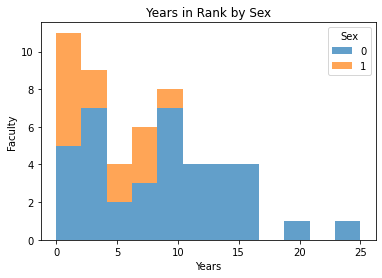

In [27]:
data.pivot_table(index=data.index, columns='Sex', values='Year') \
    .plot(kind='hist', alpha=0.7, stacked=True, bins=12,
          title='Years in Rank by Sex')
plt.xlabel('Years')
plt.ylabel('Faculty')
plt.show()

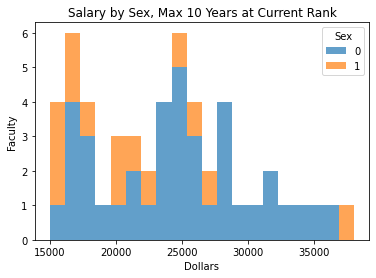

In [28]:
data.pivot_table(index=data.index, columns='Sex', values='Salary') \
    .plot(kind='hist', alpha=0.7, stacked=True, bins=20,
          title='Salary by Sex, Max 10 Years at Current Rank')
plt.xlabel('Dollars')
plt.ylabel('Faculty')
plt.show()

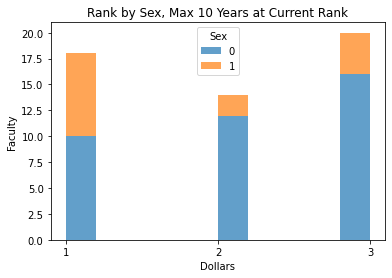

In [29]:
data.pivot_table(index=data.index, columns='Sex', values='Rank') \
    .plot(kind='hist', alpha=0.7, stacked=True, 
          title='Rank by Sex, Max 10 Years at Current Rank')
plt.xticks([1,2,3])
plt.xlabel('Dollars')
plt.ylabel('Faculty')
plt.show()

In [30]:
# coclusion:
#Looking last 10 years or less there is no corelation with sex. There is no salary discrimination by sex
